<a href="https://colab.research.google.com/github/JonathanJuradoS/MecanismosSeleccionPractico/blob/main/LimaSmart_MecanismosSeleccion_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🏨 LimaSmart - Optimización de Tarifas Dinámicas con Algoritmos Genéticos

Este notebook aplica mecanismos de selección, cruce y mutación sobre un conjunto de precios binarios para maximizar el ingreso estimado de un hotel urbano.


## Paso 1: Cargar y visualizar el dataset

In [1]:

import pandas as pd
import random
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("lima_smart_tarifas.csv")
df = df.sort_values(by="Fitness", ascending=False).reset_index(drop=True)
df


,ID,Cromosoma,Ingreso_estimado,Fitness
0,6,111110011011,222.44,222.44
1,15,111001011110,213.17,213.17
2,13,100111111000,209.08,209.08
3,3,11100110100,207.77,207.77
4,11,11001110101,205.36,205.36
5,5,10001111001,184.42,184.42
6,4,10100100100,172.45,172.45
7,10,1110110,165.64,165.64
8,7,11110100,165.02,165.02
9,9,1011101000,162.68,162.68


## Paso 2: Implementar mecanismos de selección

In [2]:

def seleccion_ruleta(df, n=4):
    total_fit = df['Fitness'].sum()
    seleccionados = []
    for _ in range(n):
        pick = random.uniform(0, total_fit)
        current = 0
        for _, row in df.iterrows():
            current += row['Fitness']
            if current >= pick:
                seleccionados.append(row['Cromosoma'])
                break
    return seleccionados

def seleccion_torneo(df, n=4, k=3):
    seleccionados = []
    for _ in range(n):
        grupo = df.sample(k)
        ganador = grupo.loc[grupo['Fitness'].idxmax()]
        seleccionados.append(ganador['Cromosoma'])
    return seleccionados

def seleccion_elitismo(df, n=4):
    return df.head(n)['Cromosoma'].tolist()

def seleccion_ranking(df, n=4):
    df_sorted = df.sort_values(by='Fitness').reset_index(drop=True)
    df_sorted['Rank'] = df_sorted.index + 1
    total_ranks = df_sorted['Rank'].sum()
    seleccionados = []
    for _ in range(n):
        pick = random.uniform(0, total_ranks)
        current = 0
        for _, row in df_sorted.iterrows():
            current += row['Rank']
            if current >= pick:
                seleccionados.append(row['Cromosoma'])
                break
    return seleccionados

def seleccion_estocastica(df, n=4):
    df = df.copy()
    df['Probabilidad'] = df['Fitness'] / df['Fitness'].sum()
    df['Acumulada'] = df['Probabilidad'].cumsum()
    start = random.uniform(0, 1/n)
    puntos = [start + i/n for i in range(n)]
    seleccionados = []
    for punto in puntos:
        for _, row in df.iterrows():
            if punto <= row['Acumulada']:
                seleccionados.append(row['Cromosoma'])
                break
    return seleccionados


## Paso 3: Aplicar cada mecanismo de selección

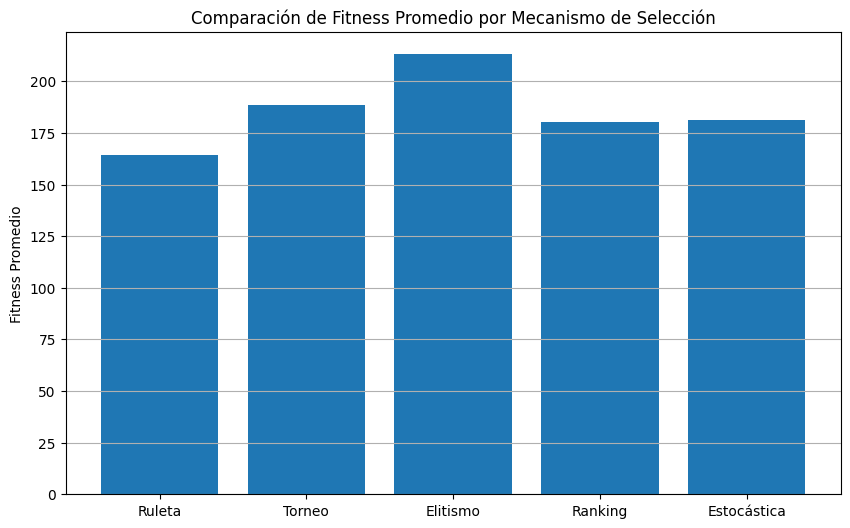

In [3]:

ruleta = seleccion_ruleta(df)
torneo = seleccion_torneo(df)
elitismo = seleccion_elitismo(df)
ranking = seleccion_ranking(df)
estocastica = seleccion_estocastica(df)

def fitness_prom(rutas):
    return df[df['Cromosoma'].isin(rutas)]['Fitness'].mean()

resultados = {
    "Ruleta": {"Individuos": ruleta, "Fitness Promedio": fitness_prom(ruleta)},
    "Torneo": {"Individuos": torneo, "Fitness Promedio": fitness_prom(torneo)},
    "Elitismo": {"Individuos": elitismo, "Fitness Promedio": fitness_prom(elitismo)},
    "Ranking": {"Individuos": ranking, "Fitness Promedio": fitness_prom(ranking)},
    "Estocástica": {"Individuos": estocastica, "Fitness Promedio": fitness_prom(estocastica)}
}

# Visualización
plt.figure(figsize=(10,6))
plt.bar(resultados.keys(), [v["Fitness Promedio"] for v in resultados.values()])
plt.title("Comparación de Fitness Promedio por Mecanismo de Selección")
plt.ylabel("Fitness Promedio")
plt.grid(axis='y')
plt.show()


## Paso 4 y 5: Cruce de un punto y mutación simple

In [5]:
def cruce_un_punto(p1, p2):
    p1, p2 = str(p1), str(p2)
    punto = random.randint(1, len(p1)-1)
    return p1[:punto] + p2[punto:], p2[:punto] + p1[punto:]

def mutar(crom, tasa=0.1):
    crom = str(crom)
    return ''.join('1' if c == '0' and random.random() < tasa else
                   '0' if c == '1' and random.random() < tasa else c for c in crom)

nuevos = {}
for metodo, datos in resultados.items():
    padres = list(map(str, datos['Individuos']))
    if len(padres) >= 2:
        h1, h2 = cruce_un_punto(padres[0], padres[1])
        nuevos[metodo] = [mutar(h1), mutar(h2)]

nuevos


{'Ruleta': ['0011101000.', '00010101.00'],
 'Torneo': ['11101100101.0', '0110010.1'],
 'Elitismo': ['111111011110', '111001010011'],
 'Ranking': ['111001100000.0', '10011111100.0'],
 'Estocástica': ['11100101111.0', '110011001010.0']}


## ✅ Conclusiones Finales

- Los mecanismos de selección como **elitismo** y **torneo** favorecen la mejora rápida pero tienden a reducir diversidad.
- Métodos como **ruleta**, **ranking** y **estocástica universal** permiten mantener la variabilidad en la población.
- La **mutación simple** es fundamental para evitar la convergencia prematura.
- La visualización del fitness promedio permite seleccionar estrategias más eficientes para la evolución genética.
- Este enfoque es útil en decisiones dinámicas como precios de habitaciones, tarifas, recursos o combinaciones de marketing.
